## NETFLIX CONTENT STRATEGY DATA ANALYSIS PROJECT 

## GOAL 
The goal is to analyze Netflix's content strategy to understand how different factors, such as content type, language, season, and timing, affect viewership patterns. we will identify best best-performing content 
It helps to understand how Netflix maximises audience engagement throughout the year

In [314]:
### 2023 Data of all shows and movies

In [315]:
### let's install some important libraries

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [317]:
## now let's import data using pandas

In [318]:
df = pd.read_csv('netflix_content_2023.csv')

In [319]:
df.head(5)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [320]:
## DATA CLEANING AND PREPROCESSING

In [321]:
## hours viewed(we have to remove the commas in between values to use it for visualisation purpose)

In [322]:
df['Hours Viewed'] = df['Hours Viewed'].replace(',','',regex = True).astype(int)

In [323]:
df.head(5)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,English,Movie


In [324]:
## DISTRIBUTION OF TOTAL VIEWERSHIP HOURS BETWEEN MOVIES AND SHOWS(who dominates the most?) 

In [325]:
## aggregate viewership hours by content

content_type_views = df.groupby('Content Type')['Hours Viewed'].sum()

In [326]:
content_type_views

Content Type
Movie     50637800000
Show     107764100000
Name: Hours Viewed, dtype: int64

In [327]:
fig = go.Figure(data=[go.Bar(
    x = content_type_views.index,
    y = content_type_views.values,
    marker_color = ['skyblue','pink'])])

fig.update_layout(
    title  = 'Total_views_contenttype(2023)',
    xaxis_title  = 'content_type',
    yaxis_title = 'hours viewed (in billions)',
    height = 400,
    width = 800)
    


### Observation
it shows that the shows dominated the total viewership with large gap of numbers.
Netflix content strategy prefers more shows over movies.


In [329]:
## Which language contributes to the most views(in hours) ?

In [330]:
language_viewers = df.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending = False)

In [331]:
language_viewers

Language Indicator
English        124441700000
Korean          15378400000
Non-English     10439100000
Japanese         7102000000
Hindi             926100000
Russian           114600000
Name: Hours Viewed, dtype: int64

In [332]:
## let's plot using plotly

In [333]:
fig = go.Figure(data = [go.Bar(
    x = language_viewers.index,
    y = language_viewers.values,
    marker_color = ['lightgreen'])])


In [334]:
fig.update_layout(
    title = 'Total views by language',
    xaxis_title = 'language',
    yaxis_title = 'hours_viewed(in billions)',
    xaxis_tickangle=45,
height = 500,
width = 1000)

### Observation
According to bar graph, it clearly shows that Most of the viewers choose english language to watch shows and movies.
Netflix also provides diverse content as showed above korean and other non-english languages also contributes a lot to content.

In [336]:
df

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,English,Movie
...,...,...,...,...,...,...
24807,We Are Black and British: Season 1,No,NaN,100000,English,Show
24808,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,100000,English,Movie
24809,Whitney Cummings: Jokes,No,2022-07-26,100000,English,Movie
24810,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,100000,English,Movie


In [337]:
## Now let's find out the month and period of time at which netflix releases are on it's peak

In [338]:
## First to extract the month we have to convert release date into datetime format so that we can get a month wise data

In [339]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Month'] = pd.to_datetime(df['Release Date']).dt.month

In [340]:
monthly_viewers = df.groupby('Release Month')['Hours Viewed'].sum()

In [341]:
monthly_viewers

Release Month
1.0      7271600000
2.0      7103700000
3.0      7437100000
4.0      6865700000
5.0      7094600000
6.0      8522000000
7.0      6524800000
8.0      6817800000
9.0      7262200000
10.0     8123200000
11.0     7749500000
12.0    10055800000
Name: Hours Viewed, dtype: int64

In [342]:
fig = go.Figure(data = [go.Scatter(
    x = monthly_viewers.index,
    y = monthly_viewers.values,
    marker_color = ['lightcoral'])])


In [343]:
fig.update_layout(
    title = 'Total no.of releases',
    xaxis_title = 'Release month',
    yaxis_title = 'Hours_viewed(in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    xaxis_tickangle = 45,
    height = 400,
    width = 800)

### Observation
This visualisation shows monthly viewership and viewership increase during JUNE and end of year DECEMBER months.
The reasons of highest viewerships possibly because of holidays in DECEMBER month.


In [345]:
## Now let's find out the top 5 most viewed content shows/movies on NETFLIX

In [346]:
top_5 = df.nlargest(5,'Hours Viewed')

In [347]:
top_5

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show,3.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show,1.0
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000,Korean,Movie,6.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show,12.0
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000,English,Show,8.0


## TOP 5 titles are:
1) The Night Agent: Season 1	with 812.1 million hours viewed (ENGLISH/SHOW)
2) Ginny & Georgia: Season 2 with 665.1 million hours viewed (ENGLISH/SHOW)
3) King the Land: Limited Series with 630.2 million hours viewed (MOVIE/SHOW)
4) The Glory: Season 1 with 622.8 million hours viewed (KOREAN/SHOW)
5) ONE PIECE: Season 1 with 541.9 million hours viewed (ENGLISH/SHOW)

In [349]:
## Now let's see thee hours viewership by content type (MOVIE/SHOW)
## we use pivot table here in order to do multiple indexing by month, by content type

In [350]:
content_type_views = df.groupby('Content Type')['Hours Viewed'].sum()

In [351]:
monthly_content_viewers =df.pivot_table(index = 'Release Month',
                                       columns = 'Content Type',
                                       values = 'Hours Viewed',
                                       aggfunc = 'sum')

In [352]:
monthly_content_viewers

Content Type,Movie,Show
Release Month,,
1.0,2275900000,4995700000
2.0,1654400000,5449300000
3.0,2109400000,5327700000
4.0,2757600000,4108100000
5.0,2520500000,4574100000
6.0,3135800000,5386200000
7.0,1615700000,4909100000
8.0,2186400000,4631400000
9.0,2092300000,5169900000


In [353]:
fig = go.Figure()
for content_type in monthly_content_viewers.columns:
    fig.add_trace(
    go.Scatter(
    x = monthly_content_viewers.index,
    y = monthly_content_viewers[content_type],
        name = content_type,
    marker_color = ['Skyblue','Pink']))

In [354]:
fig.update_layout(
    title = 'Viewership content type monthwise (2023)',
    xaxis_title = 'Month',
    yaxis_title = 'Hours_viewed(in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    xaxis_tickangle = 45,
    height = 600,
    width = 900,
legend_title = 'content type')

### Observation
- The graph above shows the total viewerships in hours for year 2023 monthwise.
- It shows clearly that SHOWS have higher rate of watching time consistently as compared to MOVIES.
- Movies also show upward trends in few months possibly because of special releases.

In [356]:
## let's explore viewership in hours across different seasons

In [357]:
df

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show,3.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show,1.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show,12.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000,English,Show,11.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,English,Movie,5.0
...,...,...,...,...,...,...,...
24807,We Are Black and British: Season 1,No,NaT,100000,English,Show,NaN
24808,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,100000,English,Movie,7.0
24809,Whitney Cummings: Jokes,No,2022-07-26,100000,English,Movie,7.0
24810,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,100000,English,Movie,9.0


In [358]:
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'
    

In [359]:
df['release_season'] = df['Release Month'].apply(get_season)

In [360]:
seasonal_viewers = df.groupby('release_season')['Hours Viewed'].sum()

In [361]:
seasonal_viewers

release_season
Fall      90708800000
Spring    21397400000
Summer    21864600000
Winter    24431100000
Name: Hours Viewed, dtype: int64

In [362]:
## ordering of seasons winter-spring-summer-fall
seasons_orders = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewers = seasonal_viewers.reindex(seasons_orders)

In [363]:
seasonal_viewers

release_season
Winter    24431100000
Spring    21397400000
Summer    21864600000
Fall      90708800000
Name: Hours Viewed, dtype: int64

In [364]:
fig = go.Figure(data = [
    go.Bar(
        x = seasonal_viewers.index,
        y = seasonal_viewers.values,
        marker_color = 'Purple')])

fig.update_layout(
    title = 'Total views by seasons(2023)',
    xaxis_title = 'Seasons ',
    yaxis_title = 'hours_viewed(in billions)',
    xaxis_tickangle=45,
height = 400,
width = 800,
xaxis=dict(
        categoryorder='array',
        categoryarray=seasons_orders
    ))

### Observation
- Graph above clearly shows that Fall season records the highest releases with over 80 billion hours watch time.
- It shows Netflix experiences the highest audience engagement during fall.


In [366]:
##let’s analyze the number of content releases and their viewership hours across months

In [367]:
monthly_releases = df['Release Month'].value_counts().sort_index()
monthwise_viewers = df.groupby('Release Month')['Hours Viewed'].sum()


In [368]:
## let's plot now to see month wise views

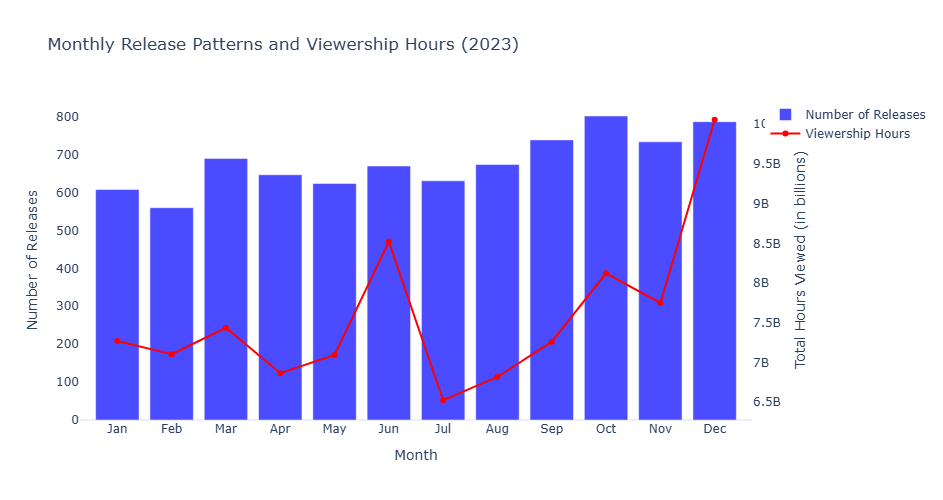

In [369]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=monthly_releases.index,
        y=monthly_releases.values,
        name='Number of Releases',
        marker_color='blue', 
        opacity=0.7,
        yaxis='y1'))

fig.add_trace(
    go.Scatter(
        x=monthly_viewers.index,
        y=monthly_viewers.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'))

fig.update_layout(
    title='Monthly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
height = 500,
width = 900)

### Observation
- as shown above in term of viewerships hours, DECEMBER tops the list.
- But if we see the no. of release at stable level(not so high)
- it signifies that people consume most of the content either new or old release during DECEMEBER which is generally considered as HOLIDAY SEASON.
  

In [370]:
## let’s explore whether Netflix has a preference for releasing content on specific weekdays
## and how this influences viewership patterns



In [429]:
df['Release Day'] = df['Release Date'].dt.day_name()
weekday_releases = df['Release Day'].value_counts().reindex( ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
                                                               'Sunday'])
    

In [372]:
weekday_releases

Release Day
Monday        436
Tuesday       995
Wednesday    1310
Thursday     1145
Friday       3863
Saturday      238
Sunday        179
Name: count, dtype: int64

In [433]:
weekday_viewers = df.groupby('Release Day')['Hours Viewed'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday',
                                                                           'Saturday','Sunday'])
    

In [435]:
weekday_viewers

Release Day
Monday        3954500000
Tuesday       5562300000
Wednesday    15744100000
Thursday     20292800000
Friday       38217200000
Saturday      5121800000
Sunday        1935300000
Name: Hours Viewed, dtype: int64

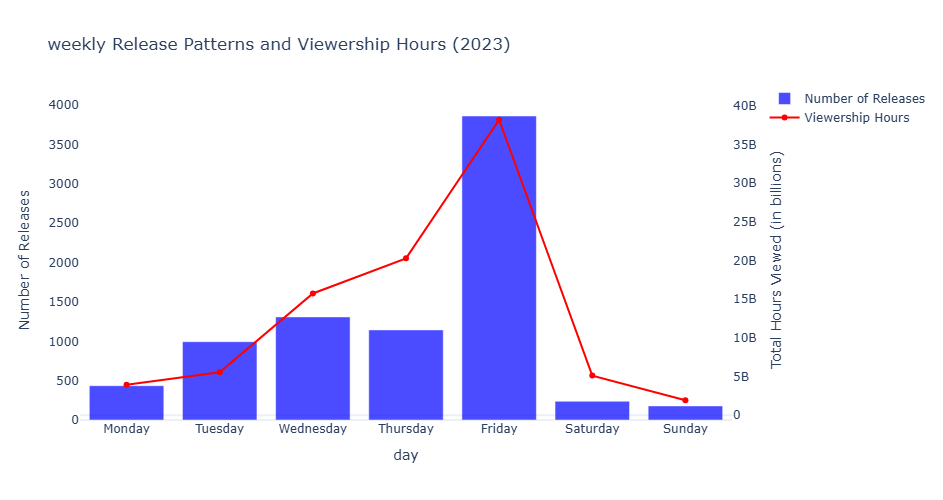

In [451]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=weekday_releases.index,
        y=weekday_releases.values,
        name='Number of Releases',
        marker_color='blue', 
        opacity=0.7,
        yaxis='y1'))

fig.add_trace(
    go.Scatter(
        x=weekday_viewers.index,
        y=weekday_viewers.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'))

fig.update_layout(
    title='weekly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='day',
       categoryorder='array',
        categoryarray= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,  
        y=1.05),
height = 500,
width = 800)

### observation
- the graph shows that the most of the content released on Friday
- this also suggests that Netflix release content on Friday from where weekend starts so that they can ensure the maximum audience engagement
- viewerships significantly dropped on Saturday and Sunday , it shows that people generally consume the newly release content at the start of weekend i.e FRIDAY
  

In [455]:
##let’s explore specific high-impact dates, such as holidays or major events, and their correlation with content releases

In [459]:
important_dates =[
    '2023-01-01', ## new year
    '2023-02-14', ## valentines day
    '2023-10-31', ## halloween
    '2023-12-25'] ## christmas

In [461]:
important_dates = pd.to_datetime(important_dates)

In [465]:
holiday_releases = df[df['Release Date'].apply(
    lambda x: any((x-date).days in range (-3,4) for date in important_dates))]

In [467]:
holiday_viewers = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

In [471]:
holiday_releases

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,release_season,Release Day
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show,12.0,Winter,Friday
6,La Reina del Sur: Season 3,No,2022-12-30,429600000,English,Show,12.0,Winter,Friday
11,Kaleidoscope: Limited Series,Yes,2023-01-01,252500000,English,Movie,1.0,Winter,Sunday
29,Perfect Match: Season 1,Yes,2023-02-14,176800000,English,Show,2.0,Winter,Tuesday
124,Lady Voyeur: Limited Series // Olhar Indiscret...,Yes,2022-12-31,86000000,Non-English,Movie,12.0,Winter,Saturday
...,...,...,...,...,...,...,...,...,...
22324,The Romantics: Limited Series,Yes,2023-02-14,1000000,English,Movie,2.0,Winter,Tuesday
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,Yes,2023-02-16,900000,Japanese,Show,2.0,Winter,Thursday
22966,The Lying Life of Adults: Limited Series // La...,Yes,2023-01-04,900000,English,Movie,1.0,Winter,Wednesday
22985,Community Squad: Season 1 // División Palermo:...,No,2023-02-17,800000,Non-English,Show,2.0,Winter,Friday


### observation
- New year release: The glory season 1 (to maximise audience engagement)
- valentines day: The Romantics: Limited Series	(relates to romantic theme)